<font color='blue'> **Beta-Me**  </font> 

In [1]:
from pathlib import Path; sim_ws  = Path('./_RES_b/002_n')        ; sim_ws.mkdir(exist_ok=True)

import sympy as sym

def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)  ; f = sym.sympify(f_list)  ; J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars): J[i,j] = sym.diff(fi, s)
    return J

Jacobian('u1 u2', ['2*u1 + 3*u2','2*u1 - 3*u2'])

Matrix([
[2,  3],
[2, -3]])

COV= [[1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667]]
U_shape: (4, 3) S_shape: (3,) Vt_shape: (3, 3)


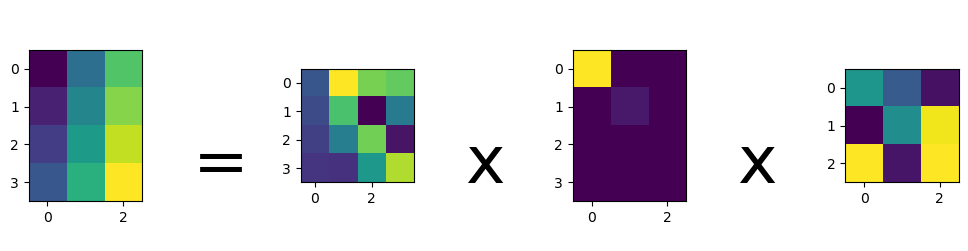

In [2]:
import numpy as np    ; import pandas as pd  ; import seaborn as sns ; from matplotlib import pyplot as plt
mm = np.array([[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]])  # ; mm = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
print('COV=', np.cov(mm, rowvar=False, bias=False))

U, Sigma, Vt = np.linalg.svd(mm, full_matrices=False)  ; print ('U_shape:', U.shape, 'S_shape:', Sigma.shape, 'Vt_shape:', Vt.shape);  S = pd.DataFrame(Sigma); S
U, s, Vt = np.linalg.svd(mm)  ; S = np.zeros(mm.shape) ; np.fill_diagonal(S, s)
def svd(mm):     U, s, Vt = np.linalg.svd(mm)   ; S = np.zeros(mm.shape)  ; np.fill_diagonal(S, s) ;  return np.round(U, 3), np.round(S, 3), np.round(Vt.T, 3)
def visualize_svd(fig_height = 6):
    U, S, V = svd(mm)
    fig, axs = plt.subplots(1, 7, figsize=(12, fig_height))
    plt.sca(axs[0]) ; plt.imshow(mm)         ; plt.sca(axs[1]) ; plt.text(.25, .25, '=', fontsize=48) ; plt.axis('off')
    plt.sca(axs[2]) ; plt.imshow(U)          ; plt.sca(axs[3]) ; plt.text(.25, .25, 'x', fontsize=48) ; plt.axis('off')
    plt.sca(axs[4]) ; plt.imshow(S)          ; plt.sca(axs[5]) ; plt.text(.25, .25, 'x', fontsize=48) ; plt.axis('off')
    plt.sca(axs[6]) ; plt.imshow(V.T)
visualize_svd(fig_height=3)

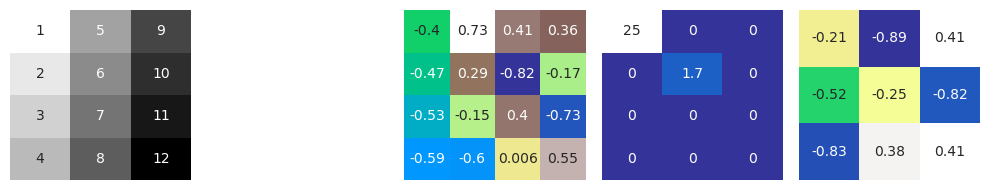

In [3]:
fig = plt.figure(figsize=(10, 2))        
ax = fig.add_subplot(151)  ; sns.heatmap(mm               , annot=True,  cmap='binary' , cbar=False) ; plt.sca(ax) ;  plt.axis('off')
ax = fig.add_subplot(153)  ; sns.heatmap(np.round(U, 3)   , annot=True,  cmap='terrain', cbar=False) ;  plt.axis('off')
ax = fig.add_subplot(154)  ; sns.heatmap(np.round(S, 3)   , annot=True,  cmap='terrain', cbar=False) ;  plt.axis('off')
ax = fig.add_subplot(155)  ; sns.heatmap(np.round(Vt.T, 3), annot=True,  cmap='terrain', cbar=False) ;  plt.axis('off')
plt.tight_layout()  
plt.show()